## Census Data

Let's look at the 5 year period between 2010 and 2015 to see what is happening.
https://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/asrh/

In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
# Let's load the smallest comma separated values (.csv) file from this directory. 
# We can create a string called "data" which contains the address.

data = 'https://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/asrh/nc-est2015-agesex-res.csv'
full = Table.read_table(data)
full

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015
0,0,3944153,3944160,3951330,3963087,3926540,3931141,3949775,3978038
0,1,3978070,3978090,3957888,3966551,3977939,3942872,3949776,3968564
0,2,4096929,4096939,4090862,3971565,3980095,3992720,3959664,3966583
0,3,4119040,4119051,4111920,4102470,3983157,3992734,4007079,3974061
0,4,4063170,4063186,4077551,4122294,4112849,3994449,4005716,4020035
0,5,4056858,4056872,4064653,4087709,4132242,4123626,4006900,4018158
0,6,4066381,4066412,4073013,4074993,4097605,4142916,4135930,4019207
0,7,4030579,4030594,4043046,4083225,4084913,4108349,4155326,4148360
0,8,4046486,4046497,4025604,4053203,4093177,4095711,4120903,4167887
0,9,4148353,4148369,4125415,4035710,4063152,4104072,4108349,4133564


In [3]:
# Let's look at how the US population has changed between 2010 and 2015

partial = full.select('SEX', "AGE", 4, 9)
partial

SEX,AGE,POPESTIMATE2010,POPESTIMATE2015
0,0,3951330,3978038
0,1,3957888,3968564
0,2,4090862,3966583
0,3,4111920,3974061
0,4,4077551,4020035
0,5,4064653,4018158
0,6,4073013,4019207
0,7,4043046,4148360
0,8,4025604,4167887
0,9,4125415,4133564


In [4]:
# Relabeling columns with table.relabeled()
us_pop = partial.relabeled(2, '2010').relabeled(3, '2015')
us_pop

SEX,AGE,2010,2015
0,0,3951330,3978038
0,1,3957888,3968564
0,2,4090862,3966583
0,3,4111920,3974061
0,4,4077551,4020035
0,5,4064653,4018158
0,6,4073013,4019207
0,7,4043046,4148360
0,8,4025604,4167887
0,9,4125415,4133564


In [5]:
#Set the format for easier number reading
us_pop.set_format([2,3], NumberFormatter)
us_pop

SEX,AGE,2010,2015
0,0,"3,951,330","3,978,038"
0,1,"3,957,888","3,968,564"
0,2,"4,090,862","3,966,583"
0,3,"4,111,920","3,974,061"
0,4,"4,077,551","4,020,035"
0,5,"4,064,653","4,018,158"
0,6,"4,073,013","4,019,207"
0,7,"4,043,046","4,148,360"
0,8,"4,025,604","4,167,887"
0,9,"4,125,415","4,133,564"


Column arithmetic

In [6]:
# What is the difference between the values of the ages in 2015 and 2010?
change = us_pop.column(3) - us_pop.column(2)



In [7]:
# make a new table that includes this new info
census = us_pop.with_columns(
    'Change', change,
    'Total Growth', change/us_pop.column(2)
)
census

SEX,AGE,2010,2015,Change,Total Growth
0,0,"3,951,330","3,978,038",26708,0.00675924
0,1,"3,957,888","3,968,564",10676,0.0026974
0,2,"4,090,862","3,966,583",-124279,-0.0303797
0,3,"4,111,920","3,974,061",-137859,-0.0335267
0,4,"4,077,551","4,020,035",-57516,-0.0141055
0,5,"4,064,653","4,018,158",-46495,-0.0114389
0,6,"4,073,013","4,019,207",-53806,-0.0132104
0,7,"4,043,046","4,148,360",105314,0.0260482
0,8,"4,025,604","4,167,887",142283,0.0353445
0,9,"4,125,415","4,133,564",8149,0.00197532


## Accessing Values

In [10]:
# Sort by "Change"
census.sort('Change', descending = True)

SEX,AGE,2010,2015,Change,Total Growth
0,999,"309,346,863","321,418,820",12071957,0.039024
1,999,"152,088,043","158,229,297",6141254,0.0403796
2,999,"157,258,820","163,189,523",5930703,0.037713
0,68,"2,359,816","3,436,357",1076541,0.456197
0,64,"2,706,055","3,536,156",830101,0.306757
0,65,"2,678,525","3,450,043",771518,0.288038
0,66,"2,621,335","3,344,134",722799,0.275737
0,67,"2,693,707","3,304,187",610480,0.226632
0,72,"1,883,820","2,469,605",585785,0.310956
2,68,"1,254,117","1,812,428",558311,0.445183


In [8]:
# what is the annual growth between 2015 and 2010?
# g = (changed / initial)**(1/t) - 1
initial = 309346863
changed = 321418820
t = 5
g = (changed / initial)**(1/t) - 1
g

0.007685750230353783

In [10]:
# we can access these values directly though!!
everyone = census.sort('Change', descending = True).row(0)
everyone

Row(SEX=0, AGE=999, 2010=309346863, 2015=321418820, Change=12071957, Total Growth=0.039024016222204264)

In [11]:
initial = everyone.item(2)
changed = everyone.item(3)
t = 5
g = (changed / initial)**(1/t) - 1
g



0.007685750230353783

In [13]:
#Let's use array arithmetic to compute the annual growth rate, g, for every row of this table:
(census.column(3)/census.column(2))**(1/t) - 1

array([ 1.34820838e-03,  5.38898505e-04, -6.15114119e-03, -6.79711022e-03,
       -2.83715844e-03, -2.29831239e-03, -2.65614637e-03,  5.15618905e-03,
        6.97103151e-03,  3.94751504e-04, -3.16165464e-03,  7.19021664e-04,
       -5.96732594e-04, -1.72256829e-03,  1.91142965e-03,  8.84276897e-04,
       -6.05234512e-03, -8.46314530e-03, -1.24649826e-02, -1.38918770e-02,
       -9.14352292e-03,  3.11790277e-03,  1.10641646e-02,  1.98293144e-02,
        2.22569542e-02,  1.97280009e-02,  1.77945538e-02,  9.39184200e-03,
        5.45525173e-03,  8.07937451e-03,  5.19498692e-03,  1.13990402e-02,
        1.82739293e-02,  1.99418760e-02,  2.35921009e-02,  2.09399619e-02,
        1.41406809e-02,  6.66673261e-03, -4.60505139e-03, -2.19183737e-02,
       -1.88214524e-02, -1.47560685e-02, -7.88558132e-03,  3.35108088e-04,
        7.38824474e-03, -2.22746770e-03, -1.68575815e-02, -2.12473034e-02,
       -2.10200069e-02, -2.02201961e-02, -1.08183284e-02, -8.59895511e-04,
       -2.78690413e-04,  

In [14]:
#call that array something and add it to our table so that we can see the growth for each age group.
census = census.with_column('Annual Growth', (census.column(3)/census.column(2))**(1/t) - 1)
census.set_format(6, PercentFormatter)
census.sort(4, descending = True)

SEX,AGE,2010,2015,Change,Total Growth,Annual Growth
0,999,"309,346,863","321,418,820",12071957,0.039024,0.77%
1,999,"152,088,043","158,229,297",6141254,0.0403796,0.79%
2,999,"157,258,820","163,189,523",5930703,0.037713,0.74%
0,68,"2,359,816","3,436,357",1076541,0.456197,7.81%
0,64,"2,706,055","3,536,156",830101,0.306757,5.50%
0,65,"2,678,525","3,450,043",771518,0.288038,5.19%
0,66,"2,621,335","3,344,134",722799,0.275737,4.99%
0,67,"2,693,707","3,304,187",610480,0.226632,4.17%
0,72,"1,883,820","2,469,605",585785,0.310956,5.56%
2,68,"1,254,117","1,812,428",558311,0.445183,7.64%


In [17]:
# Let’s get rid of these rows that include totals of all ages and let’s also look at just the 2015 population. 
us_pop_2015 = us_pop.drop('2010').where('AGE', are.below(999)).where('SEX', are.above(0))
us_pop_2015

SEX,AGE,2015
1,0,"2,035,134"
1,1,"2,029,295"
1,2,"2,026,604"
1,3,"2,030,644"
1,4,"2,055,924"
1,5,"2,050,848"
1,6,"2,050,663"
1,7,"2,117,118"
1,8,"2,128,825"
1,9,"2,111,678"


In [24]:
#  Let’s double check for not double-counting
sum(us_pop_2015.column(2))

321418820

In [29]:
# How does the population of males compare to the population of females by age?  Can I look at this in an easier way?
males = us_pop_2015.where('SEX', 1).column(2)
males
by_sex = us_pop_2015.where('SEX', 2).drop('SEX').relabeled('2015', 'Females').with_column('Males',males
)
by_sex

by_sex.set_format('Males', NumberFormatter)

AGE,Females,Males
0,"1,942,904","2,035,134"
1,"1,939,269","2,029,295"
2,"1,939,979","2,026,604"
3,"1,943,417","2,030,644"
4,"1,964,111","2,055,924"
5,"1,967,310","2,050,848"
6,"1,968,544","2,050,663"
7,"2,031,242","2,117,118"
8,"2,039,062","2,128,825"
9,"2,021,886","2,111,678"


In [30]:
# use .row and .item to access values in order to compute a ratio. 
#If the the number of males equals the number of females, what would we expect the ratio to equal?
by_sex.row(0).item(2) / by_sex.row(0).item(1)

1.047470178660397

## Line Graphs

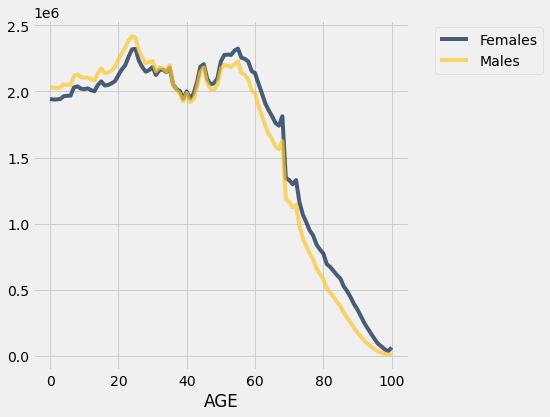

In [35]:
#plot
by_sex.plot(0)


In [19]:
# Look at combined by age population,
by_age = census.where('SEX', 0).drop('SEX').where('AGE', are.between(0,100))
by_age

AGE,2010,2015,Change,Total Growth,Annual Growth
0,"3,951,330","3,978,038",26708,0.00675924,0.13%
1,"3,957,888","3,968,564",10676,0.0026974,0.05%
2,"4,090,862","3,966,583",-124279,-0.0303797,-0.62%
3,"4,111,920","3,974,061",-137859,-0.0335267,-0.68%
4,"4,077,551","4,020,035",-57516,-0.0141055,-0.28%
5,"4,064,653","4,018,158",-46495,-0.0114389,-0.23%
6,"4,073,013","4,019,207",-53806,-0.0132104,-0.27%
7,"4,043,046","4,148,360",105314,0.0260482,0.52%
8,"4,025,604","4,167,887",142283,0.0353445,0.70%
9,"4,125,415","4,133,564",8149,0.00197532,0.04%


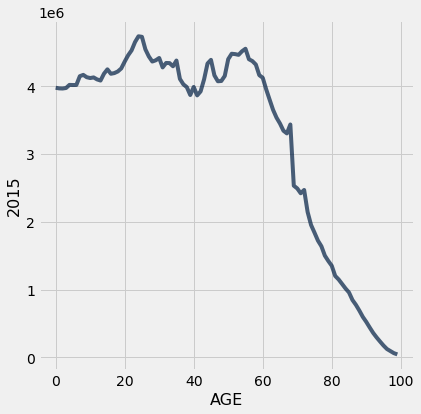

In [20]:
# plot
by_age.plot(0, 2)

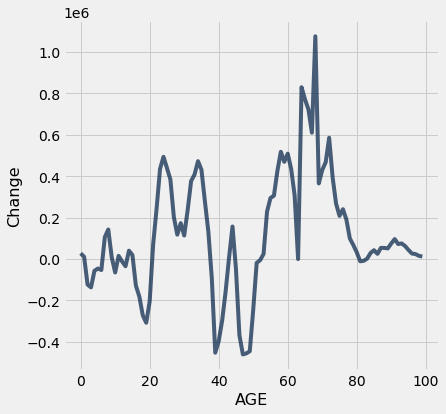

In [21]:
# visualize the change
by_age.plot(0, 3)

In [22]:
by_age.sort(3, descending = True)

AGE,2010,2015,Change,Total Growth,Annual Growth
68,"2,359,816","3,436,357",1076541,0.456197,7.81%
64,"2,706,055","3,536,156",830101,0.306757,5.50%
65,"2,678,525","3,450,043",771518,0.288038,5.19%
66,"2,621,335","3,344,134",722799,0.275737,4.99%
67,"2,693,707","3,304,187",610480,0.226632,4.17%
72,"1,883,820","2,469,605",585785,0.310956,5.56%
58,"3,802,447","4,320,522",518075,0.136248,2.59%
60,"3,616,721","4,125,792",509071,0.140755,2.67%
24,"4,243,602","4,737,345",493743,0.11635,2.23%
34,"3,822,189","4,294,838",472649,0.123659,2.36%


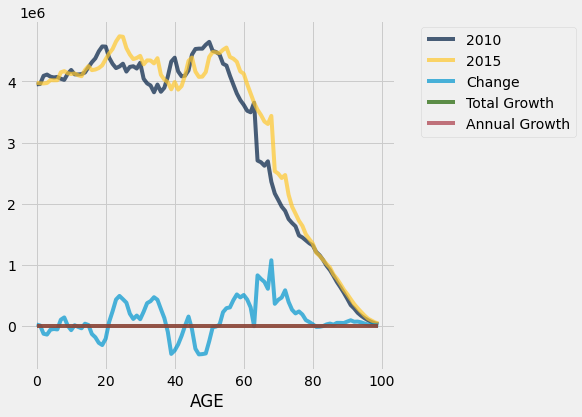

In [24]:
by_age.plot(0)

In [ ]:
# can we just specify the column on the x axis?

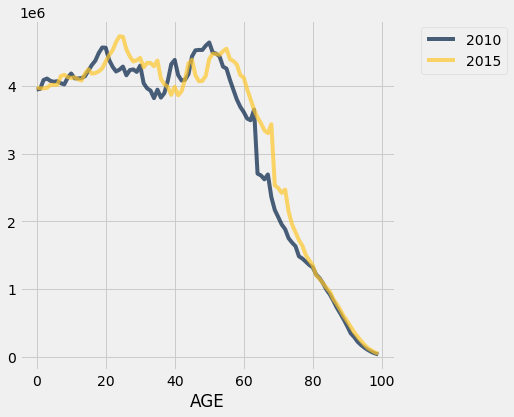

In [44]:
by_age.select(0, 1, 2).plot(0)

## Scatter plots

In [27]:
# Load data
actors = Table.read_table('actors.csv')
actors

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


In [28]:
#relabel column
actors = actors.relabeled(5, '#1 Movie Gross')
actors

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,#1 Movie Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


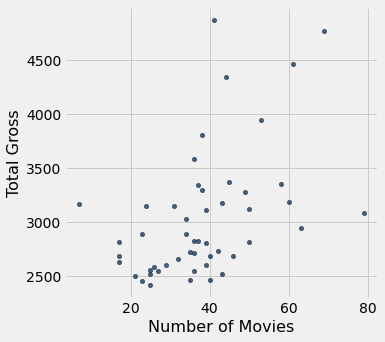

In [31]:
#what type of plot should I use?
actors.scatter(2, 1)

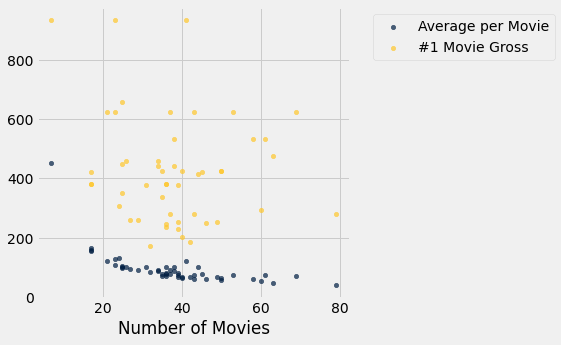

In [52]:
actors.select(2, 3, 5).scatter(0)

In [53]:
#what movie is that?!
actors.where(5, are.above(800))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,#1 Movie Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7
Andy Serkis,2890.6,23,125.7,Star Wars: The Force Awakens,936.7


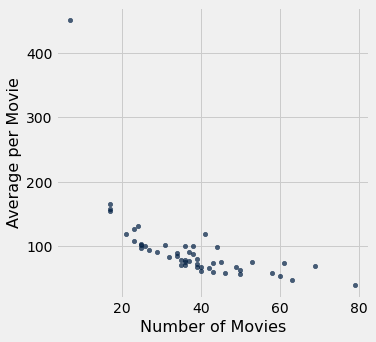

In [54]:
#just look at two variables.
actors.scatter(2, 3)

In [55]:
actors.where(2, are.below(10))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,#1 Movie Gross
Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7


In [56]:
actors.where(2, are.above(60))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,#1 Movie Gross
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Robert DeNiro,3081.3,79,39,Meet the Fockers,279.3
Liam Neeson,2942.7,63,46.7,The Phantom Menace,474.5
